<a href="https://colab.research.google.com/github/Glo14/DataEngineeringProjects/blob/main/Teoria_de_portafolio_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autor: Sergio Diaz Paredes

# Contacto: [Linkedin](https://www.linkedin.com/in/sergio-diaz-paredes/)

# Análisis de Riesgo y Rendimiento: CAPM, Sharpe Ratio y VaR

Este notebook presenta un análisis financiero de una cartera de inversión utilizando el modelo CAPM, el cálculo del Ratio de Sharpe, y la estimación del Valor en Riesgo (VaR). Se utilizan datos históricos de Yahoo Finance.

## 1. Importar Bibliotecas y Datos

Primero, importamos las bibliotecas necesarias y descargamos los datos de Yahoo Finance.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm

# Descargar datos históricos
tickers = ['AAPL', '^GSPC']  # Apple y S&P 500
data = yf.download(tickers, start='2015-01-01', end='2024-01-01', interval='1mo')['Adj Close']
data.head()

[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,^GSPC
Date,,
2015-01-01 00:00:00+00:00,26.119577,1994.989990
2015-02-01 00:00:00+00:00,28.638786,2104.500000
2015-03-01 00:00:00+00:00,27.849827,2067.889893
2015-04-01 00:00:00+00:00,28.010979,2085.510010
2015-05-01 00:00:00+00:00,29.159163,2107.389893


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

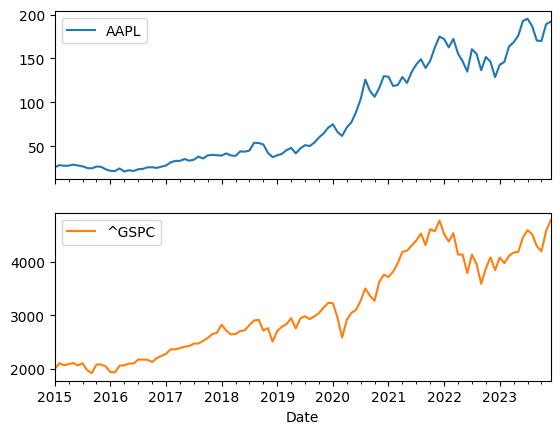

In [ ]:
data.plot(subplots=True)

<Axes: xlabel='Date'>

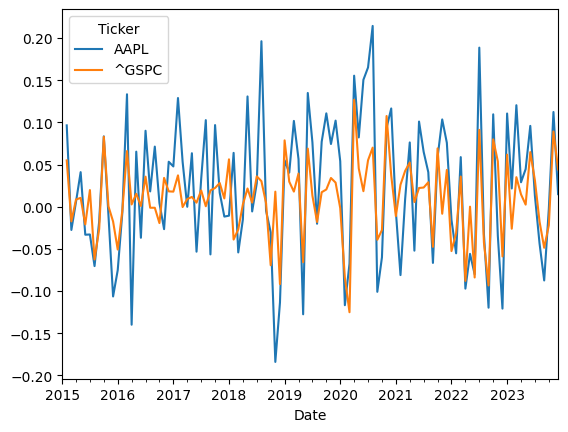

In [ ]:
data.pct_change().plot()

## 2. Calcular Retornos Diarios

Calculamos los retornos diarios para los activos y el índice de referencia.

In [ ]:
# Calcular los retornos porcentuales diarios
returns = data.pct_change().dropna()

# Separar los retornos del activo y del mercado
asset_returns = returns['AAPL']
market_returns = returns['^GSPC']

returns.head()

Ticker,AAPL,^GSPC
Date,,
2015-02-01 00:00:00+00:00,0.096449,0.054893
2015-03-01 00:00:00+00:00,-0.027549,-0.017396
2015-04-01 00:00:00+00:00,0.005786,0.008521
2015-05-01 00:00:00+00:00,0.040990,0.010491
2015-06-01 00:00:00+00:00,-0.033206,-0.021012


## 3. Aplicar el Modelo CAPM

El CAPM establece una relación lineal entre el rendimiento de un activo y el rendimiento del mercado, ajustado por el riesgo (Beta).

La fórmula del CAPM se utiliza para calcular el rendimiento esperado de un activo, dado su riesgo en comparación con el mercado:

$$
\text{E}(R_i) = R_f + \beta_i (\text{E}(R_m) - R_f)
$$

- $\text{E}(R_i)$: Rendimiento esperado del activo $i$.
- $R_f$: Tasa libre de riesgo (usualmente bonos del gobierno).
- $\beta_i$: Sensibilidad del activo $i$ al mercado (pendiente de la regresión entre $R_i$ y $R_m$).
- $\text{E}(R_m)$: Rendimiento esperado del mercado.

**Interpretación:**
- **Alpha ($\alpha$)**: Intercepto de la regresión. Representa el rendimiento adicional no explicado por el mercado.
- **Beta ($\beta$)**: Pendiente de la regresión. Mide la sensibilidad del activo en relación al mercado.


In [ ]:
risk_free_rate = 0.015

In [ ]:
returns.cov()

Ticker,AAPL,^GSPC
Ticker,,
AAPL,0.006742,0.002640
^GSPC,0.002640,0.002081


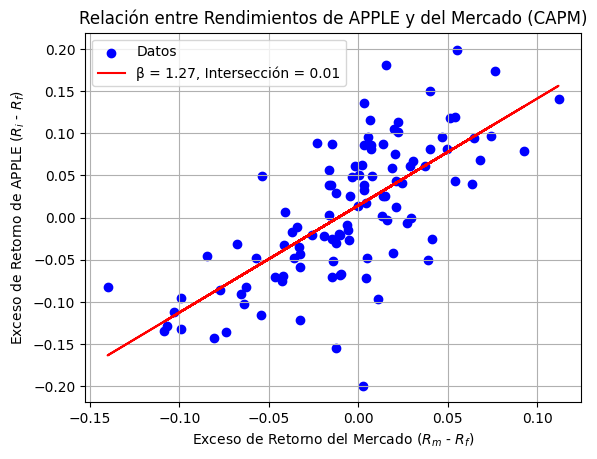

In [ ]:
x = market_returns - risk_free_rate
y = asset_returns - risk_free_rate

plt.scatter(x, y, color='blue', label='Datos')
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, color='red', label=f'β = {slope:.2f}, Intersección = {intercept:.2f}')

plt.title('Relación entre Rendimientos de APPLE y del Mercado (CAPM)')
plt.xlabel('Exceso de Retorno del Mercado ($R_m$ - $R_f$)')
plt.ylabel('Exceso de Retorno de APPLE ($R_i$ - $R_f$)')
plt.legend()
plt.grid(True)
plt.show()

### Interpretación del CAPM

El valor del $\beta$ de 1.27 indica que **el activo es más sensible** a los movimientos del mercado en comparación con el promedio del mercado. Específicamente, un $\beta$ mayor que 1 sugiere que el activo es más volátil que el mercado. En este caso, con un $\beta$ de 1.27, se espera que el activo tenga un rendimiento que sea aproximadamente un 27% más volátil que el mercado. Esto significa que si el mercado sube o baja en un 1%, el rendimiento del activo podría subir o bajar en un 1.27% en promedio.

## 4. Calcular el Sharpe Ratio

El Sharpe Ratio mide el rendimiento ajustado por riesgo, y se calcula como la diferencia entre el rendimiento del activo y el rendimiento libre de riesgo, dividido por la desviación estándar del rendimiento del activo.

$$
\text{Sharpe Ratio} = \frac{E(R_i) - R_f}{\sigma_i}
$$

- $E(R_i)$: Rendimiento esperado del activo $i$.
- $R_f$: Tasa libre de riesgo.
- $\sigma_i$: Desviación estándar de los rendimientos del activo $i$.

In [ ]:
# Supongamos un retorno libre de riesgo del 4% anual
risk_free_rate = 0.00327  # 4% anual transformado a meses

# Calcular el Sharpe Ratio
excess_return = asset_returns.mean() - risk_free_rate
sharpe_ratio = excess_return / asset_returns.std()
print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 0.22942964090203952


### Interpretación del Sharpe Ratio

Un Sharpe Ratio más alto indica un mejor rendimiento ajustado por riesgo. Es útil para comparar diferentes activos o carteras.

- **Sharpe Ratio < 1.0**:
  - **Malo**: Significa que el rendimiento de la inversión es bajo en comparación con el riesgo. En este caso, el exceso de retorno sobre la tasa libre de riesgo no compensa suficientemente la volatilidad.
  
- **Sharpe Ratio entre 1.0 y 2.0**:
  - **Aceptable/Bueno**: Indica un rendimiento decente en relación con el riesgo asumido. La inversión está proporcionando un retorno ajustado al riesgo que puede considerarse satisfactorio.

- **Sharpe Ratio entre 2.0 y 3.0**:
  - **Muy Bueno**: Señala que la inversión está generando un rendimiento significativamente mejor en relación con el riesgo asumido. Es una señal de que la inversión está superando las expectativas de rendimiento ajustado por riesgo.

- **Sharpe Ratio > 3.0**:
  - **Excelente**: Indica que la inversión ofrece un retorno excepcional ajustado por riesgo. Es raro encontrar inversiones con un Sharpe Ratio tan alto, lo que sugiere que está muy bien compensada en relación con el riesgo.


## 5. Calcular el Valor en Riesgo (VaR)

El VaR es una medida del riesgo de una cartera, que estima la pérdida máxima esperada bajo condiciones normales de mercado en un periodo específico con un cierto nivel de confianza.

El VaR mide la pérdida máxima que una cartera puede sufrir en un periodo dado con un nivel de confianza específico. Una de las fórmulas más comunes, basada en el método de varianza-covarianza, es:

$$
\text{VaR} = \left( \text{Z}_{\alpha} \times \sigma_i \right) - E(R_i)
$$

- $\text{Z}_{\alpha}$: Valor crítico de la distribución normal correspondiente al nivel de confianza $1 - \alpha$.
- $\sigma_i$: Desviación estándar de los retornos.
- $E(R_i)$: Rendimiento esperado del activo o cartera.

**Interpretación:**
- VaR te dice cuánto puedes perder como máximo con un nivel de confianza determinado (por ejemplo, 95%).
- Si el VaR es alto, el riesgo es elevado.

In [ ]:
# Especifica el nivel de confianza
confidence_level = 0.95

# Valor crítico Z para el nivel de confianza
z_score = norm.ppf(1 - confidence_level)

# Calcular VaR
VaR =  z_score * asset_returns.std() - asset_returns.mean()

# VaR en términos monetarios
initial_investment = 1000  # Supongamos una inversión inicial de 1 millón
VaR_monetary = VaR * initial_investment
print(f"VaR (95%): {VaR_monetary}")

VaR (95%): -157.17239217174554


### Interpretación del VaR

El VaR estimado representa la pérdida máxima que se podría esperar en la cartera en un día determinado, con un nivel de confianza del 95%. Este es un valor importante para la gestión de riesgos en la inversión.

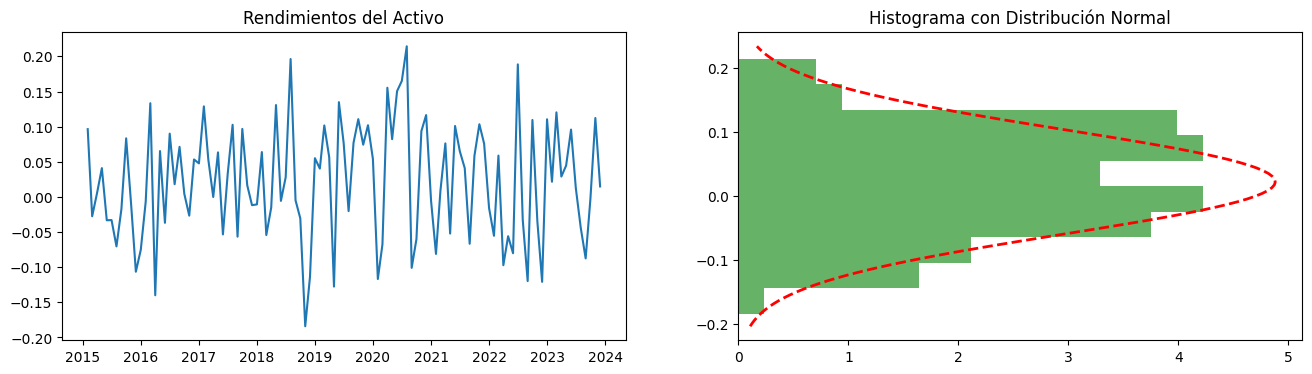

In [ ]:
import scipy.stats as stats
returns = asset_returns

fig, ax1 = plt.subplots(1, 2, figsize=(16, 4))

ax1[0].plot(returns)
ax1[0].set_title('Rendimientos del Activo')

ax1[1].hist(returns, bins=10, orientation="horizontal", density=True, alpha=0.6, color='g')
mu, std = np.mean(returns), np.std(returns)

# Generar una curva de distribución normal usando la media y desviación estándar
xmin, xmax = ax1[1].get_ylim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)

ax1[1].plot(p, x, 'r--', linewidth=2)
ax1[1].set_title('Histograma con Distribución Normal')

plt.show()

### Probabilidad de perdida

Podemos aplicar el proceso inverso para determinar cual es la probabilidad de obtener un retorno negativo.

In [ ]:
p_perdida_v = norm.cdf(0,asset_returns.mean(),asset_returns.std())
print(f"Probabilidad de un retorno negativo: {p_perdida_v:.2f}")

Probabilidad de un retorno negativo: 0.39


## 6. Cartera Diversificada

- **Apple Inc. (AAPL)**: Tecnología
  - **Descripción**: Líder en el desarrollo de productos tecnológicos innovadores, incluyendo teléfonos inteligentes (iPhone), computadoras (Mac), y servicios digitales (App Store, iCloud).

- **Microsoft Corporation (MSFT)**: Tecnología
  - **Descripción**: Empresa global en software y servicios tecnológicos, conocida por su sistema operativo Windows, suite de productividad Office, y servicios en la nube a través de Azure.

- **Alphabet Inc. (GOOGL)**: Tecnología
  - **Descripción**: Conglomerado tecnológico que es la empresa matriz de Google, ofreciendo servicios de búsqueda en internet, publicidad digital, y productos tecnológicos innovadores.

- **Amazon.com Inc. (AMZN)**: Consumo Discrecional
  - **Descripción**: Gigante del comercio electrónico y servicios en la nube, ofreciendo una amplia gama de productos y servicios que incluyen ventas en línea, Amazon Web Services (AWS), y dispositivos inteligentes.

- **Tesla, Inc. (TSLA)**: Consumo Discrecional
  - **Descripción**: Pionero en la industria de vehículos eléctricos y soluciones de energía renovable, conocido por sus innovadores automóviles eléctricos y productos de energía solar.


In [ ]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Definir los tickers de las 5 empresas
tickers = [
    'AAPL',  # Apple Inc.
    'MSFT',  # Microsoft Corporation
    'GOOGL', # Alphabet Inc.
    'AMZN',  # Amazon.com Inc.
    'TSLA'   # Tesla, Inc.
]

# Descargar datos históricos de precios
data = yf.download(tickers, start='2011-01-01', end='2024-01-01', interval='1mo')['Adj Close']
data.head()

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA
Date,,,,,
2011-01-01 00:00:00+00:00,10.233833,8.4820,15.006801,21.353964,1.606667
2011-02-01 00:00:00+00:00,10.652751,8.6645,15.332753,20.468382,1.592667
2011-03-01 00:00:00+00:00,10.511003,9.0065,14.666851,19.667568,1.850000
2011-04-01 00:00:00+00:00,10.559859,9.7905,13.600507,20.078121,1.840000
2011-05-01 00:00:00+00:00,10.490496,9.8345,13.223562,19.373220,2.009333


<Axes: xlabel='Date'>

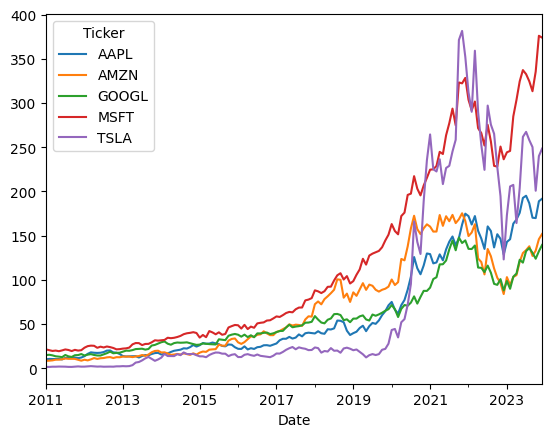

In [ ]:
data.plot()

In [ ]:
returns = data.pct_change().dropna()

# Calcular las estadísticas necesarias
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_assets = len(tickers)
num_portfolios = 10000
risk_free_rate = 0.00327

In [ ]:
# Función para calcular el rendimiento y la volatilidad de un portafolio
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, volatility

In [ ]:
# Función para limitar las ponderaciones a ser positivas y sumar 1
def check_sum(weights):
    return np.sum(weights) - 1

In [ ]:
# Función de optimización para maximizar el Sharpe Ratio
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_ret, p_vol = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_vol

In [ ]:
# Calcular la frontera eficiente
def efficient_frontier(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results = np.zeros((num_portfolios, 3))
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        p_ret, p_vol = portfolio_performance(weights, mean_returns, cov_matrix)
        results[i, 0] = p_ret
        results[i, 1] = p_vol
        results[i, 2] = (p_ret - risk_free_rate) / p_vol
    return results

In [ ]:
# Generar la frontera eficiente
results = efficient_frontier(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

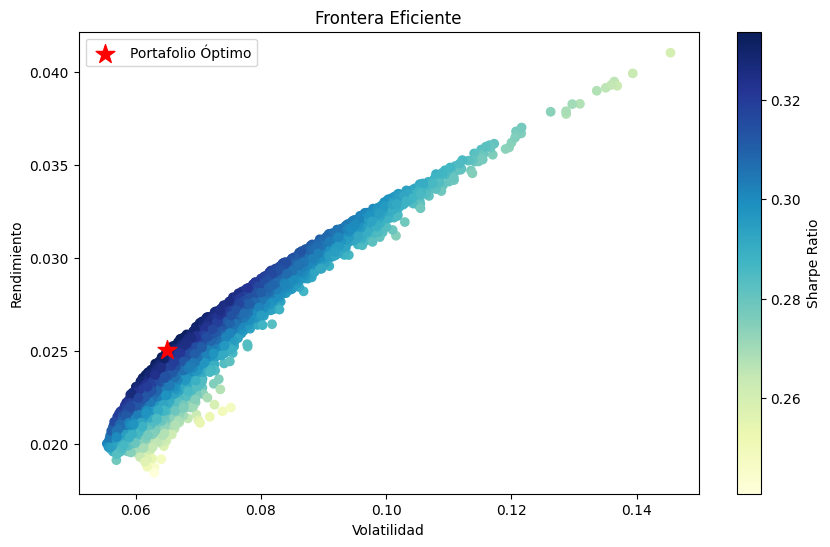

Portafolio Óptimo:
Rendimiento esperado: 0.0250
Volatilidad: 0.0651
Sharpe Ratio: 0.3341
Ponderaciones: [0.15943646 0.11627404 0.01102549 0.5591264  0.15413761]
Activos: Index(['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'TSLA'], dtype='object', name='Ticker')


In [ ]:
# Encontrar el portafolio con el máximo Sharpe Ratio
constraints = ({'type': 'eq', 'fun': check_sum})
bounds = tuple((0, 1) for asset in range(num_assets))
initial_guess = num_assets * [1. / num_assets,]

opt_results = minimize(negative_sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix, risk_free_rate),
                       method='SLSQP', bounds=bounds, constraints=constraints)

# Datos del portafolio óptimo
opt_weights = opt_results.x
opt_return, opt_volatility = portfolio_performance(opt_weights, mean_returns, cov_matrix)
opt_sharpe = -opt_results.fun

# Visualizar la frontera eficiente
plt.figure(figsize=(10, 6))
plt.scatter(results[:, 1], results[:, 0], c=results[:, 2], cmap='YlGnBu', marker='o')
plt.colorbar(label='Sharpe Ratio')

# Añadir el portafolio óptimo a la gráfica
plt.scatter(opt_volatility, opt_return, color='red', marker='*', s=200, label='Portafolio Óptimo')

plt.xlabel('Volatilidad')
plt.ylabel('Rendimiento')
plt.title('Frontera Eficiente')
plt.legend(loc='best')
plt.show()

# Mostrar resultados
print("Portafolio Óptimo:")
print(f"Rendimiento esperado: {opt_return:.4f}")
print(f"Volatilidad: {opt_volatility:.4f}")
print(f"Sharpe Ratio: {opt_sharpe:.4f}")
print(f"Ponderaciones: {opt_weights}")
print(f"Activos: {data.columns}")